# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [42]:
df = pd.read_csv("previsao_de_renda.csv", index_col='index')
df = df.drop("Unnamed: 0", axis=1)
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
3405,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
7944,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85


In [43]:
quantitativas = ["qtd_filhos", "idade", "tempo_emprego", "qt_pessoas_residencia", "renda"]
df[quantitativas].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


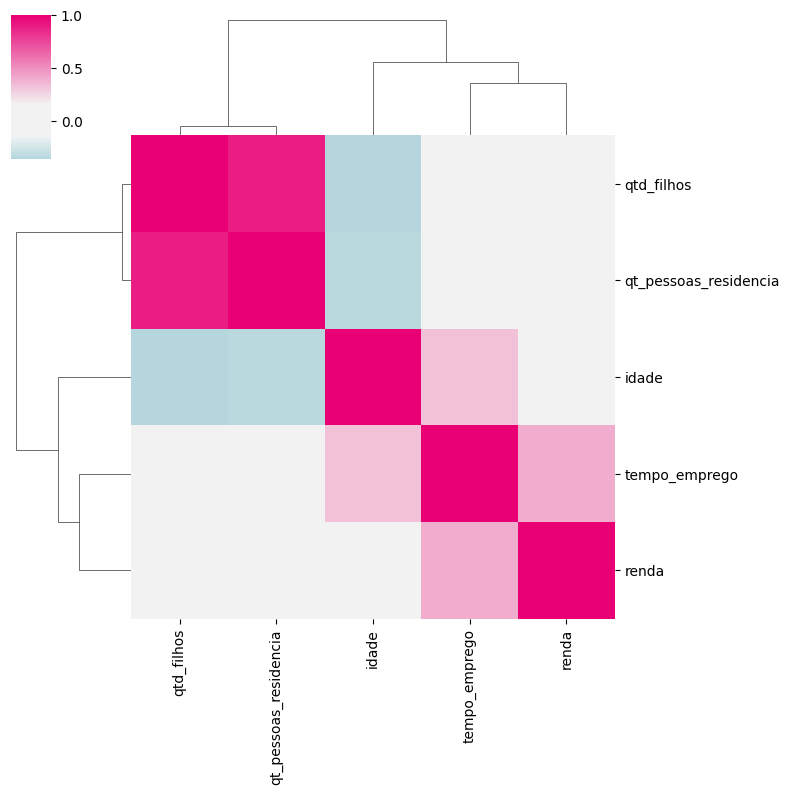

In [44]:
cmap = sns.diverging_palette(h_neg=215, h_pos=355, s=100, l=50, as_cmap=True, sep = 40, center = 'light')

sns.clustermap(df[quantitativas].corr(), figsize=(8, 8), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='idade', ylabel='tempo_emprego'>

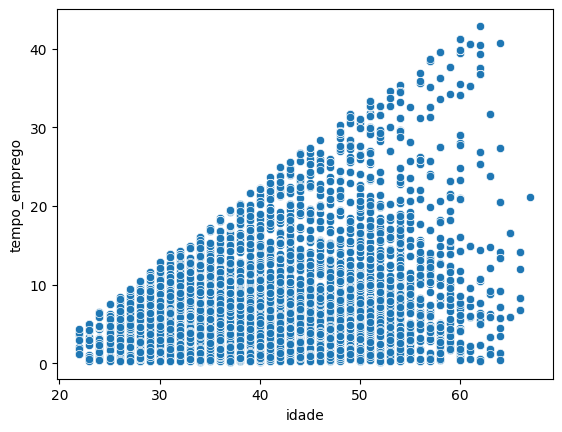

In [59]:
sns.scatterplot(df, x='idade', y='tempo_emprego')

<Axes: xlabel='idade', ylabel='renda'>

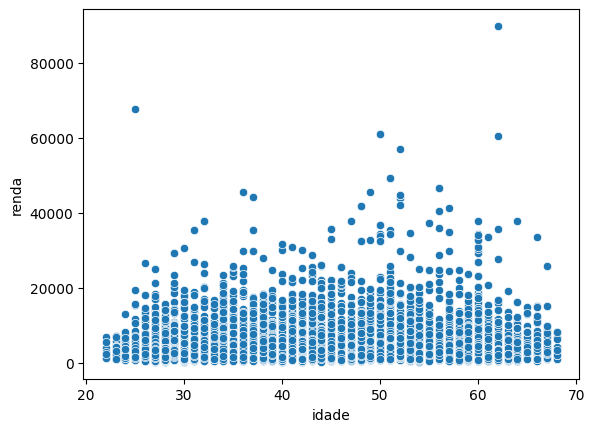

In [60]:
sns.scatterplot(df, x='idade', y='renda')

<Axes: xlabel='tempo_emprego', ylabel='renda'>

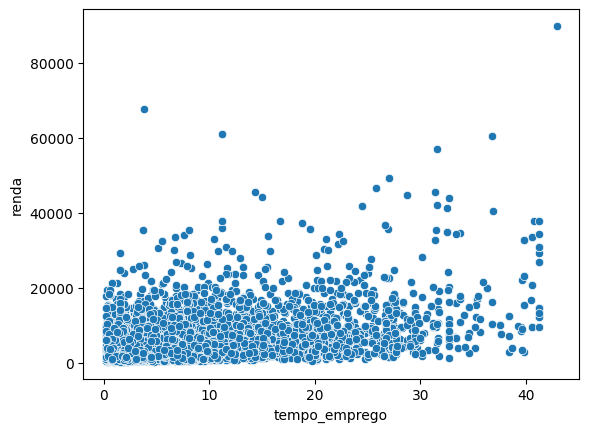

In [61]:
sns.scatterplot(df, x='tempo_emprego', y='renda')

3) Na su aopinião, há outliers na variável renda?

<Axes: xlabel='index', ylabel='renda'>

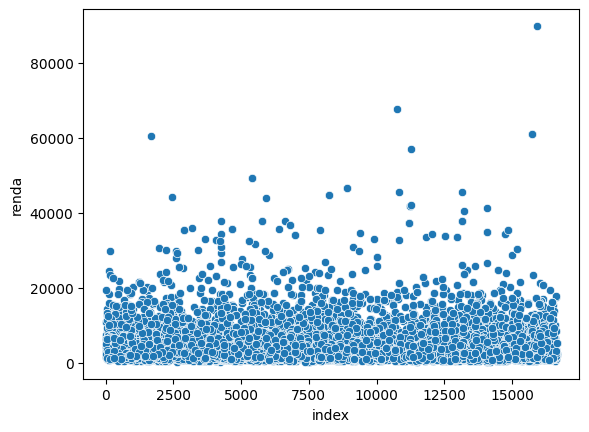

In [65]:
sns.scatterplot(df, x=df.index, y='renda')

<Axes: ylabel='renda'>

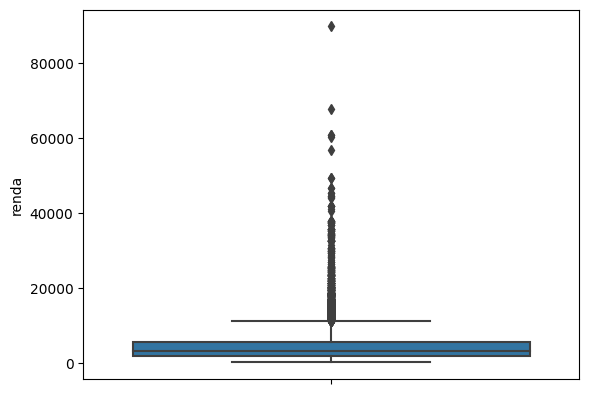

In [50]:
sns.boxplot(df, y='renda')

### Comentário

Analisando o gráfico de dispersão e o boxplot podemos observar que existem valores muito acima da média e que poderia ser considerados outliers, visto que podem influenciar nos modelos preditivos

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [51]:
df['renda_log'] = np.log(df['renda'])
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,renda_log
index,,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,8.122442
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,8.715411
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,8.640999
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,8.888300
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,8.298383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29,7.084469
3405,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18,7.831689
7944,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85,7.369506


<Axes: xlabel='index', ylabel='renda_log'>

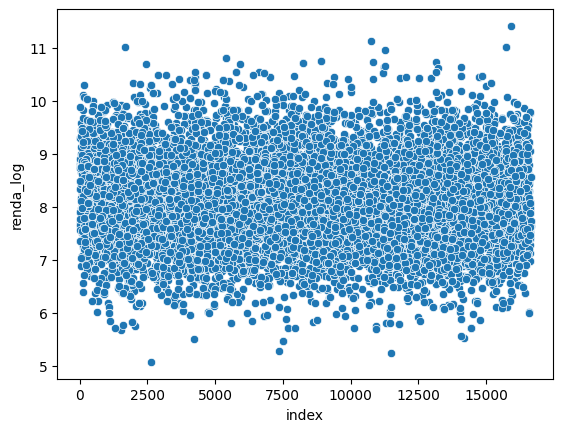

In [67]:
sns.scatterplot(df, x=df.index, y='renda_log')

<Axes: ylabel='renda_log'>

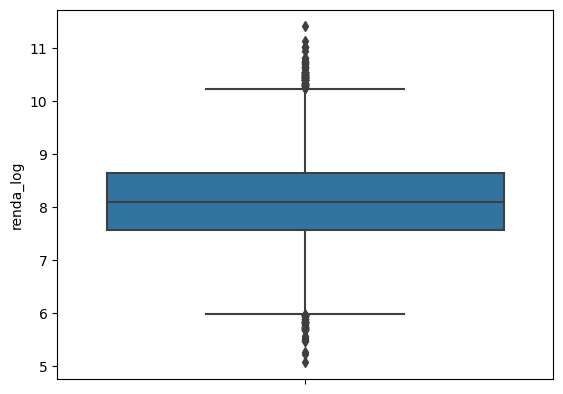

In [68]:
sns.boxplot(df, y='renda_log')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### Resposta

Sim, após a aplicação da função logarítimica, é possível perceber nos gráficos uma melhor distribuição da variável 'renda'.